In [1]:
!pip install requests hazm matplotlib seaborn

In [2]:
import requests
from bs4 import BeautifulSoup
from hazm import word_tokenize
import matplotlib.pyplot as plt
import seaborn as sns
from collections import defaultdict
import re

In [20]:
# مرحله 1: دریافت محتوای سایت
def fetch_html(url):
    try:
        response = requests.get(url)
        response.raise_for_status()
        return response.text
    except requests.exceptions.RequestException as e:
        print(f"Error: {e}")
        return None

# مرحله 2: پردازش متن و حذف تگهای HTML
def process_text(html_content):
    soup = BeautifulSoup(html_content, 'html.parser')
    text = soup.get_text()
    text = re.sub(r'\s+', ' ', text).strip()
    return text

# مرحله 3: تکنایزینگ متن
def tokenize_text(text):
    tokens = word_tokenize(text)
    return tokens

# مرحله 4: ویرایش وکتورها
def modify_tokens(tokens):
    modified_tokens = [token for token in tokens if token.lower() not in {'و', 'و یا', 'یا','or','and', 'not' , 'a',':','the','of' }]
    return modified_tokens

# مرحله 5: ایجاد ایندکس و محاسبه فرQUENCY
def create_index_and_frequency(tokens):
    index = defaultdict(list)
    frequency = defaultdict(int)

    for idx, token in enumerate(tokens):
        index[token].append(idx)
        frequency[token] += 1

    return index, frequency

# مرحله 6: مرتب سازی وکتورها بر اساس فرQUENCY
def rank_tokens(frequency):
    sorted_tokens = sorted(frequency.items(), key=lambda x: x[1], reverse=True)
    return sorted_tokens

# مرحله 7: ایجاد نمودار فرQUENCY
def plot_frequency_distribution(frequency, title):
    plt.figure(figsize=(10, 6))
    sns.barplot(x=list(frequency.values()), y=list(frequency.keys()), palette='viridis')
    plt.title(title)
    plt.xlabel('Frequency')
    plt.ylabel('Token')
    plt.xticks(rotation=45)
    plt.show()
# مرحله 7: ایجاد نمودار فرQUENCY برای ده کلمه اول
def plot_top_10_frequency_distribution(frequency, title):
    top_10 = dict(sorted(frequency.items(), key=lambda x: x[1], reverse=True)[:10])
    plt.figure(figsize=(10, 6))
    sns.barplot(x=list(top_10.values()), y=list(top_10.keys()), palette='viridis')
    plt.title(title)
    plt.xlabel('Frequency')
    plt.ylabel('Token')
    plt.xticks(rotation=45)
    plt.show()

In [10]:
url = 'https://s.ntkhost.com/karavi.ca.html'

In [11]:
html_content = fetch_html(url)

In [12]:
# مرحله 1: پردازش متن
text = process_text(html_content)

In [13]:
# مرحله 2: تکنایزینگ
tokens = tokenize_text(text)
print("\n- Tokens:", tokens)
print("\n- Tokens:", len(tokens))


- Tokens: ['ï', '»', '¿', 'Home', '-', 'Web', 'Design', 'Agency', 'Get', 'A', 'QuoteHome', 'About', 'Personnel', 'Services', 'Blog', 'Articles', 'News', 'Tutorials', 'Demo', 'Portfolio', 'Website', 'Application', 'Graphic', 'Design', 'Logo', 'design', 'Motion', 'graphics', 'Social', 'Media', 'Visual', 'identity', 'Dubbing', 'Contact', 'Â', 'Â', 'Home', 'About', 'Personnel', 'Services', 'Blog', 'Articles', 'News', 'Tutorials', 'Demo', 'Portfolio', 'Website', 'Application', 'Graphic', 'Design', 'Logo', 'design', 'Motion', 'graphics', 'Social', 'Media', 'Visual', 'identity', 'Dubbing', 'Contact', 'FacebookLinkedinTwitterYoutubeSkypeCopyright', 'Â©', '2025', 'DEVELOPER', '&', 'WEB', 'DESIGN', 'AGENCY', 'KD', 'Design,', 'support', 'and', 'launch', 'of', 'enterprise', 'software,', 'network,', 'voip,', 'website', 'and', 'application', 'in', 'karavi', 'developer', '.', '_WHO', 'WE', 'ARE', '?', 'Web', 'design', 'encompasses', 'many', 'different', 'skills', 'and', 'disciplines', 'in', 'the', '

In [21]:
# مرحله 3: ویرایش وکتورها
modified_tokens = modify_tokens(tokens)
print("\n- Modified Tokens:", modified_tokens)
print("\n- Modified Tokens:", len(modified_tokens))


- Modified Tokens: ['ï', '»', '¿', 'Home', '-', 'Web', 'Design', 'Agency', 'Get', 'QuoteHome', 'About', 'Personnel', 'Services', 'Blog', 'Articles', 'News', 'Tutorials', 'Demo', 'Portfolio', 'Website', 'Application', 'Graphic', 'Design', 'Logo', 'design', 'Motion', 'graphics', 'Social', 'Media', 'Visual', 'identity', 'Dubbing', 'Contact', 'Â', 'Â', 'Home', 'About', 'Personnel', 'Services', 'Blog', 'Articles', 'News', 'Tutorials', 'Demo', 'Portfolio', 'Website', 'Application', 'Graphic', 'Design', 'Logo', 'design', 'Motion', 'graphics', 'Social', 'Media', 'Visual', 'identity', 'Dubbing', 'Contact', 'FacebookLinkedinTwitterYoutubeSkypeCopyright', 'Â©', '2025', 'DEVELOPER', '&', 'WEB', 'DESIGN', 'AGENCY', 'KD', 'Design,', 'support', 'launch', 'enterprise', 'software,', 'network,', 'voip,', 'website', 'application', 'in', 'karavi', 'developer', '.', '_WHO', 'WE', 'ARE', '?', 'Web', 'design', 'encompasses', 'many', 'different', 'skills', 'disciplines', 'in', 'production', 'maintenance', 'w

In [22]:
# مرحله 4: ایجاد ایندکس و محاسبه فرQUENCY
index, frequency = create_index_and_frequency(modified_tokens)
print("\n- Index:", dict(index))
print("\n- Index:", len(dict(index)))


- Index: {'ï': [0], '»': [1], '¿': [2], 'Home': [3, 35], '-': [4, 328], 'Web': [5, 85, 238, 354, 489, 570], 'Design': [6, 22, 48, 447, 481, 604], 'Agency': [7], 'Get': [8], 'QuoteHome': [9], 'About': [10, 36], 'Personnel': [11, 37], 'Services': [12, 38, 499], 'Blog': [13, 39], 'Articles': [14, 40], 'News': [15, 41], 'Tutorials': [16, 42], 'Demo': [17, 43], 'Portfolio': [18, 44, 543, 546], 'Website': [19, 45, 147, 500, 510, 512, 523, 525, 538, 540], 'Application': [20, 46], 'Graphic': [21, 47], 'Logo': [23, 49], 'design': [24, 50, 86, 100, 125, 148, 162, 169, 192, 239, 253, 257, 259, 330, 415, 427, 490, 571, 585, 589, 591], 'Motion': [25, 51], 'graphics': [26, 52], 'Social': [27, 53, 188], 'Media': [28, 54], 'Visual': [29, 55], 'identity': [30, 56], 'Dubbing': [31, 57], 'Contact': [32, 58], 'Â': [33, 34, 187, 278, 418, 533, 593], 'FacebookLinkedinTwitterYoutubeSkypeCopyright': [59], 'Â©': [60], '2025': [61], 'DEVELOPER': [62], '&': [63, 184, 445, 476, 479, 561, 568], 'WEB': [64, 121], 

<ipython-input-20-e7caecbfa44a>:47: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(frequency.values()), y=list(frequency.keys()), palette='viridis')


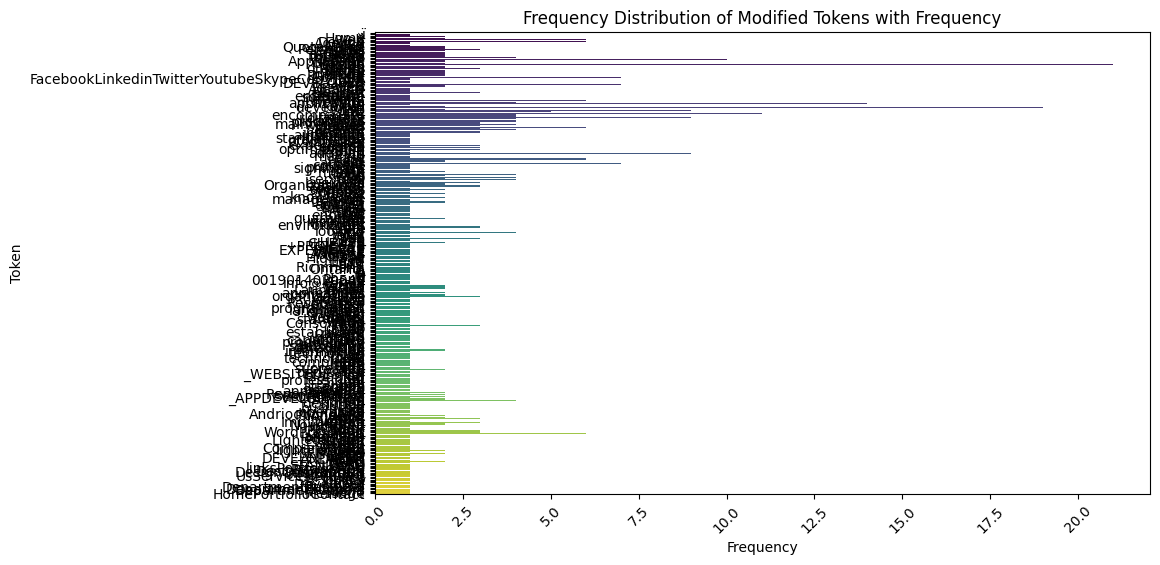

In [23]:
plot_frequency_distribution(frequency, "Frequency Distribution of Modified Tokens with Frequency")

<ipython-input-20-e7caecbfa44a>:57: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(top_10.values()), y=list(top_10.keys()), palette='viridis')


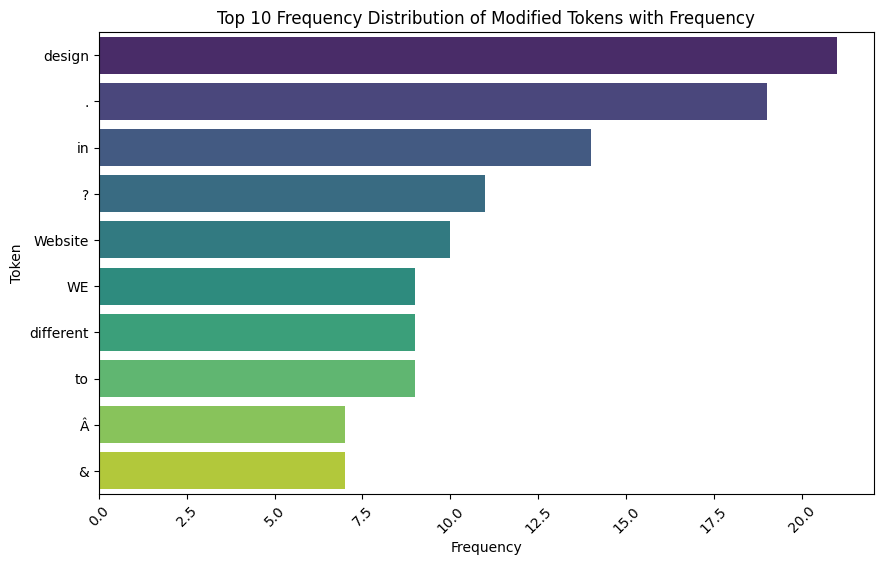

In [24]:
plot_top_10_frequency_distribution(frequency, "Top 10 Frequency Distribution of Modified Tokens with Frequency")

In [18]:
# مرحله 5: مرتب سازی وکتورها
ranked_tokens = rank_tokens(frequency)
print("\n- Ranked Tokens:", ranked_tokens)


- Ranked Tokens: [('the', 24), ('design', 21), ('.', 19), ('of', 18), ('in', 14), ('?', 11), ('Website', 10), ('WE', 9), ('different', 9), ('to', 9), ('Â', 7), ('&', 7), ('your', 7), ('Web', 6), ('Design', 6), ('website', 6), ('web', 6), ('for', 6), ('Launch', 6), ('ARE', 5), ('Portfolio', 4), ('application', 4), ('encompasses', 4), ('many', 4), ('skills', 4), ('disciplines', 4), ('production', 4), ('websites', 4), ('The', 4), ('graphic', 4), ('with', 4), ('SEO', 4), ('will', 4), ('you', 4), ('iOS', 4), ('Services', 3), ('Social', 3), ('support', 3), ('maintenance', 3), ('areas', 3), ('include', 3), ('design;', 3), ('interface', 3), ('search', 3), ('optimization', 3), ('APP', 3), ('business', 3), ('software', 3), ('design,', 3), ('are', 3), ('_', 3), ('DO', 3), ('Our', 3), ('OUR', 3), ('Client', 3), ('WordPressYear', 3), ('2021', 3), ('Home', 2), ('-', 2), ('About', 2), ('Personnel', 2), ('Blog', 2), ('Articles', 2), ('News', 2), ('Tutorials', 2), ('Demo', 2), ('Application', 2), ('Gr